pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


c:\Users\Mateus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Mateus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Mateus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Mateus\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Mateus\anaconda3\lib\site-packages\skfuzzy\cont

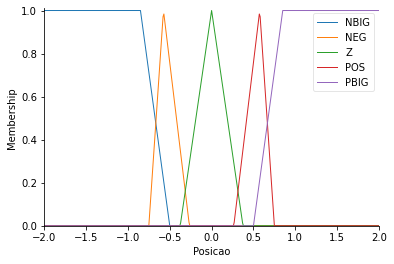

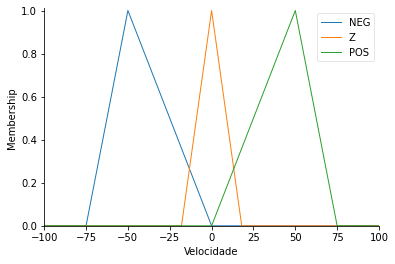

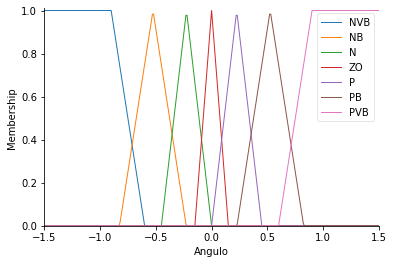

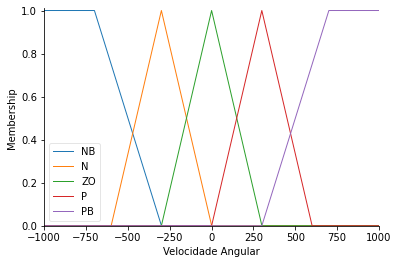

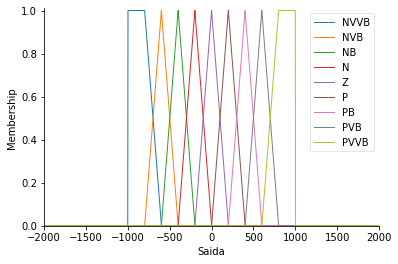

In [1]:
import pygame
import numpy as np
from scipy import linalg

import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from random import randrange 



# Parâmetros do sistema.
g = 9.8
M = 1.0
m = 0.1
l = 0.5
L = 2*l
I = m*L**2 / 12

# SENSORES.
# sensores[0]: posição. -1 1
# sensores[1]: velocidade. -20 20 
# sensores[2]: ângulo. -1 1 
# sensores[3]: velocidade angular. -10 10 
# SETPOINT em env.xRef.

Posicao = np.arange(-2, 2.01, 0.01)
Velocidade = np.arange(-100, 100.1, 0.1)
Angulo = np.arange(-1.5, 1.501, 0.01)
VelocidadeAngular = np.arange(-1000, 1000.5, 0.5)
Saida = np.arange(-2000, 2000.5, 0.5)

P = ctrl.Antecedent(Posicao, 'Posicao')
V = ctrl.Antecedent(Velocidade, 'Velocidade')
A = ctrl.Antecedent(Angulo, 'Angulo')
VA = ctrl.Antecedent(VelocidadeAngular, 'Velocidade Angular')
S = ctrl.Consequent(Saida, 'Saida')

P['NBIG'] = fuzz.trapmf(Posicao, [-2.1,-2,-0.85,-0.5])
P['NEG'] = fuzz.trimf(Posicao, [-0.75,-.575,-0.265])
P['Z'] = fuzz.trimf(Posicao, [-.375,0,.375])
P['POS'] = fuzz.trimf(Posicao, [0.265,.575,0.75])
P['PBIG'] = fuzz.trapmf(Posicao, [0.5,0.85,2,2.1])
P.view()




V['NEG'] = fuzz.trimf(Velocidade, [-75,-50,0])
V['Z'] = fuzz.trimf(Velocidade, [-18,0, 18])
V['POS'] = fuzz.trimf(Velocidade, [0,50,75 ])

# V['NEG'] = fuzz.trimf(Velocidade, [-75,-50,-8])
# V['Z'] = fuzz.trimf(Velocidade, [-8,0, 8])
# V['POS'] = fuzz.trimf(Velocidade, [8,50,75 ])
V.view()

A['NVB'] = fuzz.trapmf(Angulo,[-1.7,-1.5,-0.9,-0.6])
A['NB'] = fuzz.trimf(Angulo, [-0.825,-0.525,-0.2275])
A['N'] = fuzz.trimf(Angulo, [-0.45,-0.225,0])
A['ZO'] = fuzz.trimf(Angulo, [-0.15,0,0.15])
A['P'] = fuzz.trimf(Angulo, [0,0.225,0.45])
A['PB'] = fuzz.trimf(Angulo, [0.2275,0.525,0.825])
A['PVB'] = fuzz.trapmf(Angulo, [0.6,0.9,1.5,1.7])
A.view()

VA['NB'] = fuzz.trapmf(VelocidadeAngular, [-1002,-1000,-700,-300])
VA['N'] = fuzz.trimf(VelocidadeAngular, [-600,-300,0])
VA['ZO'] = fuzz.trimf(VelocidadeAngular, [-300,0,300])
VA['P'] = fuzz.trimf(VelocidadeAngular, [0,300,600])
VA['PB'] = fuzz.trapmf(VelocidadeAngular, [300,700,1000,1002])
VA.view()


S['NVVB'] = fuzz.trapmf(Saida, [-1002,-1000,-800,-600])
S['NVB'] = fuzz.trimf(Saida, [-800,-600,-400])
S['NB'] = fuzz.trimf(Saida, [-600,-400,-200])
S['N'] = fuzz.trimf(Saida, [-400,-200,0])
S['Z'] = fuzz.trimf(Saida, [-200,0,200])
S['P'] = fuzz.trimf(Saida, [0,200,400])
S['PB'] = fuzz.trimf(Saida, [200,400,600])
S['PVB'] = fuzz.trimf(Saida, [400,600,800])
S['PVVB'] = fuzz.trapmf(Saida, [600,800,1000,1002])
S.view()


Regra1 = ctrl.Rule(P['NBIG'] & V['NEG'], S['PVVB'])
Regra2 = ctrl.Rule(P['NEG'] & V['NEG'], S['PVB'])
Regra3 = ctrl.Rule(P['Z'] & V['NEG'], S['PB'])
Regra4 = ctrl.Rule(P['Z'] & V['Z'], S['Z'])
Regra5 = ctrl.Rule(P['Z'] & V['POS'], S['NB'])
Regra6 = ctrl.Rule(P['POS'] & V['POS'], S['NVB'])
Regra7 = ctrl.Rule(P['PBIG'] & V['POS'], S['NVVB'])

Regra8 = ctrl.Rule(A['NVB'] & VA['NB'], S['NVVB'])
Regra9 = ctrl.Rule(A['NVB'] & VA['N'], S['NVVB'])
Regra10 = ctrl.Rule(A['NVB'] & VA['ZO'], S['NVB'])
Regra11 = ctrl.Rule(A['NVB'] & VA['P'], S['NB'])
Regra12 = ctrl.Rule(A['NVB'] & VA['PB'], S['N'])

Regra13 = ctrl.Rule(A['NB'] & VA['NB'], S['NVVB'])
Regra14 = ctrl.Rule(A['NB'] & VA['N'], S['NVB'])
Regra15 = ctrl.Rule(A['NB'] & VA['ZO'], S['NB'])
Regra16 = ctrl.Rule(A['NB'] & VA['P'], S['N'])
Regra17 = ctrl.Rule(A['NB'] & VA['PB'], S['Z'])

Regra18 = ctrl.Rule(A['N'] & VA['NB'], S['NVB'])
Regra19 = ctrl.Rule(A['N'] & VA['N'], S['NB'])
Regra20 = ctrl.Rule(A['N'] & VA['ZO'], S['N'])
Regra21 = ctrl.Rule(A['N'] & VA['P'], S['Z'])
Regra22 = ctrl.Rule(A['N'] & VA['PB'], S['P'])

Regra23 = ctrl.Rule(A['ZO'] & VA['NB'], S['NB'])
Regra24 = ctrl.Rule(A['ZO'] & VA['N'], S['N'])
Regra25 = ctrl.Rule(A['ZO'] & VA['ZO'], S['Z'])
Regra26 = ctrl.Rule(A['ZO'] & VA['P'], S['P'])
Regra27 = ctrl.Rule(A['ZO'] & VA['PB'], S['PB'])

Regra28 = ctrl.Rule(A['P'] & VA['NB'], S['N'])
Regra29 = ctrl.Rule(A['P'] & VA['N'], S['Z'])
Regra30 = ctrl.Rule(A['P'] & VA['ZO'], S['P'])
Regra31 = ctrl.Rule(A['P'] & VA['P'], S['PB'])
Regra32 = ctrl.Rule(A['P'] & VA['PB'], S['PVB'])

Regra33 = ctrl.Rule(A['PB'] & VA['NB'], S['Z'])
Regra34 = ctrl.Rule(A['PB'] & VA['N'], S['P'])
Regra35 = ctrl.Rule(A['PB'] & VA['ZO'], S['PB'])
Regra36 = ctrl.Rule(A['PB'] & VA['P'], S['PVB'])
Regra37 = ctrl.Rule(A['PB'] & VA['PB'], S['PVVB'])

Regra38 = ctrl.Rule(A['PVB'] & VA['NB'], S['P'])
Regra39 = ctrl.Rule(A['PVB'] & VA['N'], S['PB'])
Regra40 = ctrl.Rule(A['PVB'] & VA['ZO'], S['PVB'])
Regra41 = ctrl.Rule(A['PVB'] & VA['P'], S['PVVB'])
Regra42 = ctrl.Rule(A['PVB'] & VA['PB'], S['PVVB'])

SistemaControle = ctrl.ControlSystem([Regra1, Regra2, Regra3, Regra4, Regra5, Regra6, Regra7, Regra8, Regra9, Regra10, 
    Regra11, Regra12, Regra13, Regra14, Regra15, Regra16, Regra17, Regra18, Regra19, Regra20, Regra21, Regra22, Regra23, Regra24, Regra25, Regra26, 
    Regra27, Regra28, Regra29, Regra30, Regra31, Regra32, Regra33, Regra34, Regra35, Regra36, Regra37, Regra38, Regra39, Regra40, Regra41, Regra42])

Controle = ctrl.ControlSystemSimulation(SistemaControle) 
# Função de controle: Ação nula.
def funcao_controle_1(sensores):
    dist= sensores[0] 
    Controle.input['Posicao'] = dist
    Controle.input['Velocidade'] = sensores[1]
    Controle.input['Angulo'] = sensores[2]
    Controle.input['Velocidade Angular'] = sensores[3]
    Controle.compute()
    
    acao = Controle.output['Saida']
    #acao = Controle.defuzz(Saida, Controle., 'centroid')
    print(dist, sensores[1], sensores[2], sensores[3], acao)
    return acao

